In [6]:
#找尋高頻作者
import codecs
import os
from collections import defaultdict

input_path = "D:\\課業相關\\論文資料\\雷震處理資料\\source\\自由中國(2nd)\\自由中國-非文藝類\\"

author = defaultdict(int)
error = 0

for file in os.listdir(input_path):
    with codecs.open(input_path+file,'rb','utf8') as f:
        head = f.readline().strip().split()
        
        if len(head) != 6: #大多為無作者、翻譯及英文姓名
            error += 1
            #print (head)
        else:
            author[head[-1]] += 1
            '''if len(head[-1].split('(')) == 2:
                author[head[-1].split('(')[1].split(')')[0]] += 1'''
            '''if '社論('+head[-1]+')' in author: #考慮社論，最後社論數量為社論+一般
                author['社論('+head[-1]+')'] +=1'''

author_sort = sorted(author.items(), key=lambda d:d[1], reverse = True)

with codecs.open('C:\\Users\\user\\Desktop\\num2.csv','wb','utf8') as g:
    for index,(e,c) in enumerate(author_sort):
        if index < 40:
            print (e,c)
        g.write(e+','+str(c)+'\r\n')

社論 361
時事述評 110
短評 97
雷震 89
殷海光 80
夏道平 63
傅正 48
龍平甫 41
社論(夏道平) 38
蔣勻田 30
朱伴耘 29
社論(雷震) 28
社論(殷海光) 27
胡適 27
羅鴻詔 26
聶華苓 21
社論(傅正) 20
徐逸樵 18
戴杜衡 16
許思澄 16
毛子水 16
瞿荊洲 15
警雷 14
許冠三 12
董鼎山 12
史信 12
方及 12
趙岡 11
劉國增 11
郭廷以 11
海耶克著殷海光譯 10
陶百川 10
東方既白 10
陳式銳 10
齊佑之 10
孫宏偉 10
王雲五 10
姜懷平 9
辛之魯 9
李聲庭 9


In [75]:
#整理特定作者文本待之後分析，考慮社論+文章，不考慮複數作者
import codecs
import os
from collections import defaultdict

condicate_author = ['雷震','殷海光','夏道平','龍平甫','蔣勻田','傅正','朱伴耘','胡適','羅鴻詔']
author_index = defaultdict(int)

for i in condicate_author:
    author_index[i] = 1

input_path = "D:\\課業相關\\論文資料\\雷震處理資料\\source\\自由中國(2nd)\\自由中國-非文藝類\\"
out_path = "C:\\Users\\user\\Desktop\\author\\"

for file in os.listdir(input_path):
    with codecs.open(input_path+file,'rb','utf8') as f:
        head = f.readline().strip().split()
        if len(head) != 6:
            continue
        if '社論(' in head[-1]:
            '''with codecs.open(out_path+'log.txt','ab','utf8') as a:
                a.write(head[-1]+'\r\n')'''
            if len(head[-1].split('(')) == 2:
                head[-1] = head[-1].split('(')[1].split(')')[0]
            else:
                print(file)
                content = f.readline().strip()
                '''with codecs.open("C:\\Users\\user\\Desktop\\error author\\"+file,'wb','utf8') as g:
                    g.write(' '.join(head)+'\r\n')
                    g.write(content+'\r\n')'''
                    
        if head[-1] in condicate_author:
            content = f.readline().strip()
            
            with codecs.open(out_path+head[-1]+'_'+str(author_index[head[-1]])+'.txt','wb','utf8') as g:
                g.write(' '.join(head)+'\r\n')
                g.write(content+'\r\n')
                
            author_index[head[-1]] += 1


print ('END')

1514.txt
1538.txt
1552.txt
1627.txt
2634.txt
2635.txt
2990.txt
3342.txt
3344.txt
3418.txt
3448.txt
731.txt
END


In [13]:
#整理特定作者文本待之後分析，考慮社論+文章，不考慮複數作者(新版)
import codecs
import os
from collections import defaultdict

input_path = "D:\\課業相關\\論文資料\\雷震處理資料\\source\\自由中國(2nd)\\自由中國-非文藝類\\"
out_path = "C:\\Users\\user\\Desktop\\author\\"
author_path = "C:\\Users\\user\\Desktop\\自由中國作者候選.txt"

condicate_author = defaultdict(list) #作者及其筆名

with codecs.open(author_path,'rb','utf8') as f: #作者抓取
    content = f.readlines()
    for line in content:
        if line.strip() == '':
            break
        line = [i.split(',')[0] for i in line.strip().split()]
        for name in line:
            condicate_author[line[0]].append(name)
            
author_count = defaultdict(int)

for file in os.listdir(input_path):
    with codecs.open(input_path+file,'rb','utf8') as f:
        head = f.readline().strip().split()
        
        if len(head) != 6:
            continue
        else:
            for k,v in condicate_author.items():
                if head[-1] in v:
                    content = f.readline().strip()
            
                    with codecs.open(out_path+k+'_'+str(author_count[k]+1)+'.txt','wb','utf8') as g:
                        g.write(' '.join(head)+'\r\n')
                        g.write(content+'\r\n')

                    author_count[k] += 1
                    
author_count = sorted(author_count.items(), key=lambda d:d[1], reverse = True)
for (name,number) in author_count:
    print (name,number)
print ('END')

雷震 89
殷海光 80
夏道平 63
傅正 48
龍平甫 41
蔣勻田 30
朱伴耘 29
胡適 27
羅鴻詔 26
END


In [33]:
#自由中國作者預測
import os
import codecs
import numpy as np
from collections import defaultdict
from sklearn import svm
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import time
from sklearn.ensemble import RandomForestClassifier

input_path = "D:\\課業相關\\論文資料\\SVM\\condicate_author\\"
no_path = "D:\\課業相關\\論文資料\\SVM\\language_feature\\平衡語料庫前100高頻詞.csv"
condicate_author = ['雷震','殷海光','夏道平','龍平甫','蔣勻田','傅正','朱伴耘','胡適','羅鴻詔','聶華苓']
content_list = []

target = defaultdict(int) #各作者編號
for i,e in enumerate(condicate_author):
    target[e] = i
print (target)
    
feature = [] #特徵
with codecs.open(no_path,'rb','utf8') as f:
    for i in f.readlines():
        if i.strip() != '':
            feature.append(i.strip().split(',')[0])

y = []
    
for file in os.listdir(input_path):
    with codecs.open(input_path+file,'rb','utf8') as f:
        head = f.readline()
        content = f.readline().strip()
        
        content_list.append(content)
        y.append(target[file.split('_')[0]])
        
def line_vec(line):
    temp_feature = defaultdict(int)
    
    for i in line:
        if i.split('(')[0] in feature:
            temp_feature[i.split('(')[0]] += 1
    return temp_feature

aa_feature = np.zeros((len(content_list),len(feature)),np.float64)

for index,element in enumerate(content_list):
    line = element.split()
    temp_feature = line_vec(line)
    
    for i,j in enumerate(feature):
        aa_feature[index, i] = round(temp_feature[j] * 1000000 / len(line),3)

X = aa_feature
y = np.array(y)

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

'''tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

start = time.time()
clf = GridSearchCV(svm.SVC(C=1,probability=True), tuned_parameters, cv=5) #篇數一致
clf.fit(X_train, y_train)
end = time.time()'''

# use a full grid over all parameters
'''param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [1, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}'''

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

# run grid search
start = time.time()
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True)
#clf = GridSearchCV(RandomForestClassifier(n_estimators=20), param_grid=param_grid, cv=5)
clf = GridSearchCV(rfc, param_grid=param_grid, cv=5)
clf.fit(X_train, y_train)
end = time.time()

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred)) #target_names=condicate_author
print (end-start)
print()

defaultdict(<class 'int'>, {'殷海光': 1, '傅正': 5, '朱伴耘': 6, '蔣勻田': 4, '雷震': 0, '羅鴻詔': 8, '胡適': 7, '龍平甫': 3, '聶華苓': 9, '夏道平': 2})
Best parameters set found on development set:

{'max_features': 'sqrt', 'n_estimators': 200}

Grid scores on development set:

0.866 (+/-0.059) for {'max_features': 'auto', 'n_estimators': 200}
0.860 (+/-0.075) for {'max_features': 'auto', 'n_estimators': 700}
0.880 (+/-0.073) for {'max_features': 'sqrt', 'n_estimators': 200}
0.860 (+/-0.078) for {'max_features': 'sqrt', 'n_estimators': 700}
0.863 (+/-0.092) for {'max_features': 'log2', 'n_estimators': 200}
0.860 (+/-0.068) for {'max_features': 'log2', 'n_estimators': 700}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.67      0.78      0.72        18
          1       1.00      1.00      1.00        20
          2       0.59      0.83      0.69      

In [2]:
#未知作者預測

error_path = "C:\\Users\\user\\Desktop\\error author\\"

#print (target)
print (' '.join([str(i)+'.'+e for i,e in enumerate(condicate_author)]))
print ()

#clf2 = svm.LinearSVC()
#clf2.fit(X_train,y_train)

print (clf.best_score_)
#print (clf.predict_log_proba(X_test))
#print (clf2.score(X_test,y_test))
print ()

for file in os.listdir(error_path):
    pred_y = np.zeros((1,len(feature)),np.float64)
    with codecs.open("C:\\Users\\user\\Desktop\\error author\\"+file,'rb','utf8') as f:
        head = f.readline().strip()
        content = f.readline().strip().split()

        temp_feature = line_vec(content)

        for i,j in enumerate(feature):
            pred_y[0][i] = round(temp_feature[j] * 1000000 / len(content),3)

    print (head)
    print ('預測作者：'+str(clf.predict(pred_y)[0])+'.'+condicate_author[clf.predict(pred_y)[0]])
    #print (clf.predict_proba(pred_y)[0])
    print ([round(i,2) for i in clf.predict_proba(pred_y)[0].tolist()])
    #print ('預測作者：'+str(clf2.predict(pred_y)[0])+'.'+condicate_author[clf2.predict(pred_y)[0]])
    #print ([round(i,2) for i in clf2.decision_function(pred_y)[0].tolist()])
    print ()

0.雷震 1.殷海光 2.夏道平 3.龍平甫 4.蔣勻田 5.傅正 6.朱伴耘 7.胡適 8.羅鴻詔 9.聶華苓

0.813953488372
0.833819241983

1954-05-16 10卷 - 10期 這是國民黨反省的時候 社論(雷震)(殷海光)
預測作者：1.殷海光
[0.09, 0.57, 0.06, 0.01, 0.02, 0.1, 0.03, 0.07, 0.01, 0.04]

1954-06-16 10卷 - 12期 立法院給憲政開一惡例 社論(雷震)(夏道平)
預測作者：2.夏道平
[0.22, 0.21, 0.42, 0.01, 0.01, 0.05, 0.01, 0.03, 0.0, 0.04]

1954-07-01 11卷 - 01期 諾言貴實踐 社論(雷震)(夏道平)
預測作者：0.雷震
[0.46, 0.02, 0.33, 0.01, 0.02, 0.05, 0.01, 0.04, 0.01, 0.04]

1954-10-01 11卷 - 07期 又一個關係憲政的問題 社論(雷震)(夏道平)
預測作者：2.夏道平
[0.03, 0.29, 0.48, 0.01, 0.01, 0.06, 0.06, 0.02, 0.0, 0.04]

1958-01-01 18卷 - 01期 彈劾案與調查權 社論(雷震)(夏道平)
預測作者：2.夏道平
[0.06, 0.09, 0.72, 0.01, 0.0, 0.06, 0.01, 0.03, 0.0, 0.02]

1958-01-01 18卷 - 01期 為「自治」半月刊橫遭查扣而抗議 社論(雷震)(夏道平)
預測作者：2.夏道平
[0.12, 0.05, 0.69, 0.01, 0.0, 0.03, 0.01, 0.06, 0.01, 0.03]

1959-01-01 20卷 - 01期 本刊的十年回顧 社論(雷震)(夏道平)
預測作者：2.夏道平
[0.09, 0.07, 0.68, 0.01, 0.03, 0.02, 0.01, 0.03, 0.01, 0.06]

1959-12-05 21卷 - 11期 開倒車─走私案移送軍法審判 社論(雷震)(夏道平)
預測作者：2.夏道平
[0.03, 0.1, 0.48, 0.0, 0.0, 0.32, 0.01, 0.03, 0

defaultdict(<class 'int'>, {0: '雷震', 1: '殷海光', 2: '夏道平', 3: '龍平甫', 4: '蔣勻田', 5: '傅正', 6: '朱伴耘', 7: '胡適', 8: '羅鴻詔', 9: '聶華苓'})
輸入5個作者編號：0 1 2 3 4
red:雷震 green:殷海光 blue:夏道平 yellow:龍平甫 magenta:蔣勻田


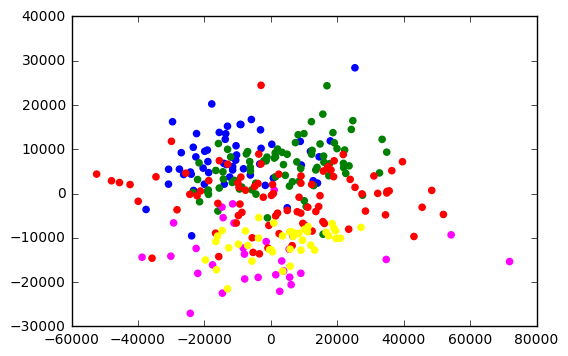

In [7]:
#圖表呈現
index_author = defaultdict(int)
for i in target:
    index_author[target[i]] = i
    
print (index_author)

find = input("輸入5個作者編號：")   
find_index = [int(x) for x in find.split()]


X_temp = []
y_temp = []

for i,e in enumerate(y.tolist()):
    if e in find_index:
        X_temp.append(X.tolist()[i])
        y_temp.append(e)
        
X_temp = np.array(X_temp)
y_temp = np.array(y_temp)

color = []
for i in y_temp:
    if i == find_index[0]:
        color.append('red')
    elif i == find_index[1]:
        color.append('green')
    elif i == find_index[2]:
        color.append('blue')
    elif i == find_index[3]:
        color.append('yellow')
    elif i == find_index[4]:
        color.append('magenta')
        
print ('red:'+index_author[find_index[0]],'green:'+index_author[find_index[1]],'blue:'+index_author[find_index[2]]\
       ,'yellow:'+index_author[find_index[3]],'magenta:'+index_author[find_index[4]])

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

'''X_reduced = PCA(n_components=3).fit_transform(X_temp)
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=color,
           cmap=plt.cm.Paired)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])'''

X_reduced = PCA(n_components=2).fit_transform(X_temp)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], color=color)
    
plt.show()

In [98]:
with codecs.open("C:\\Users\\user\\Desktop\\X.csv",'wb','utf8') as g:
    t_x = [','.join(list(map(str,l))) for l in X.tolist()]
    for i,e in enumerate(t_x):
        g.write(str(y[i])+','+e+'\r\n')

In [130]:
temper = []
for file in os.listdir(input_path):
    with codecs.open(input_path+file,'rb','utf8') as f:
        head = f.readline().strip()
        if len(head.split()) == 6 and head.split()[-1] not in temper and '夏道平' in head.split()[-1]:
            temper.append(head.split()[-1])
print (temper)

['夏道平', '社論(夏道平)', '朱啟葆(夏道平)', '社論(雷震)(夏道平)', '米塞斯著夏道平譯', '胡適講夏道平譯']


In [5]:
myset = set(list(y_train))

for i in myset:
    print (i,list(y_train).count(i))

0 63
1 52
2 43
3 33
4 26
5 22
6 24
7 23
8 20
9 15


[1 1 2 3 5 0 0 6 6 8 5 0 0 1 0 7 6 0 9 9 1 3 2 5 2 8 7 1 0 5 3 3 9 0 8 1 1
 0 0 1 2 3 0 1 5 6 2 0 4 0 0 0 5 1 0 1 1 0 0 1 1 2 4 3 3 2 9 9 1 1 1 1 7 2
 8 1 8 2 2 2 5 2 1 5 4 8]
[ 0.          0.01351351  0.09459459  0.09459459  0.10810811  0.10810811
  0.14864865  0.14864865  0.33783784  0.33783784  0.48648649  0.48648649
  0.56756757  0.56756757  0.7972973   0.7972973   0.82432432  0.82432432
  0.91891892  0.91891892  1.          1.        ]
[ 0.          0.          0.          0.08333333  0.08333333  0.33333333
  0.33333333  0.41666667  0.41666667  0.5         0.5         0.58333333
  0.58333333  0.66666667  0.66666667  0.75        0.75        0.83333333
  0.83333333  0.91666667  0.91666667  1.        ]


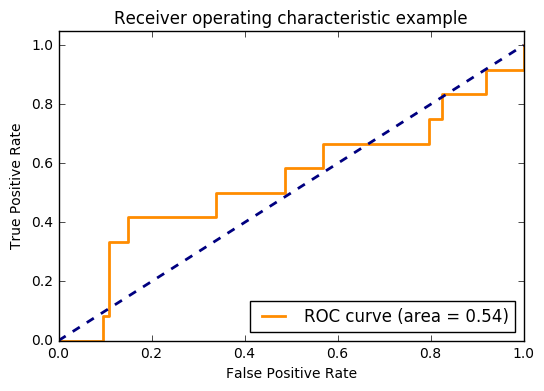

In [99]:
from sklearn.metrics import roc_curve, auc
y_score = clf.predict_proba(X_test)
y_score = [list(y_score)[i][t] for i,t in enumerate(y_test)]
y_score = clf.predict(X_test)
print (y_test)
#print (y_score)

fpr, tpr,thresholds = roc_curve(y_test, y_score, pos_label=2)
print (fpr)
print (tpr)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [84]:
import numpy.random as r
size = 10000
y_true = np.array([ 1 if i >= 0.3 else 0 for i in r.random(size) ], dtype=np.float32)
y_p = r.random(size)
y_cls = np.array([ 1 if i >= 0.5 else 0 for i in y_p ], dtype=np.float32)

print (classification_report(y_true, y_cls))

             precision    recall  f1-score   support

        0.0       0.30      0.49      0.38      3039
        1.0       0.70      0.51      0.59      6961

avg / total       0.58      0.50      0.52     10000



In [5]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape {}'.format(Counter(y)))

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X, y)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({1: 900, 0: 100})
Resampled dataset shape Counter({0: 900, 1: 900})


5:0 1 3 7 9
defaultdict(<class 'int'>, {'朱伴耘': 6, '夏道平': 2, '傅正': 5, '龍平甫': 3, '胡適': 7, '殷海光': 1, '雷震': 0, '聶華苓': 9, '蔣勻田': 4, '羅鴻詔': 8})


C:\Users\user\Anaconda2\envs\py35\lib\site-packages\imblearn\base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')
C:\Users\user\Anaconda2\envs\py35\lib\site-packages\imblearn\base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')
C:\Users\user\Anaconda2\envs\py35\lib\site-packages\imblearn\base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')
C:\Users\user\Anaconda2\envs\py35\lib\site-packages\imblearn\base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')


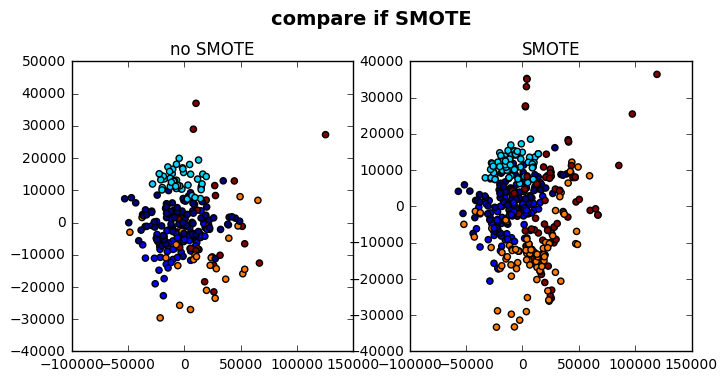

In [31]:
find_index = input('5:')

find_index = list(map(int,find_index.split()))

print (target)

X_temp = []
y_temp = []

for i,e in enumerate(y):
    if e in find_index:
        y_temp.append(e)
        X_temp.append(X[i])
        
X_c = X_temp
y_c = y_temp

for i in range(len(find_index)-1):
    X_c , y_c = SMOTE(random_state=0).fit_sample(X_c,y_c)

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_reduced = PCA(n_components=2).fit_transform(X_temp)
X_reduced2 = PCA(n_components=2).fit_transform(X_c)

# 在 1x2 的網格上繪製子圖形
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# 調整外觀
fig.subplots_adjust(top=0.85)

# 繪製散佈圖 
ax[0].scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_temp)
ax[0].set_title('no SMOTE')
ax[1].scatter(X_reduced2[:, 0], X_reduced2[:, 1], c=y_c)
ax[1].set_title('SMOTE')

# 加入標題
fig.suptitle('compare if SMOTE', fontsize=14, fontweight='bold')

# 顯示圖形
plt.show()

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

X_s = X
y_s = y
for i in range(len(condicate_author)-1):
    X_s , y_s = SMOTE(random_state=0).fit_sample(X_s,y_s)

X_train, X_test, y_train, y_test = train_test_split(X_s,y_s, test_size=0.3, random_state=0)

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

clf = GridSearchCV(svm.SVC(C=1,class_weight="balanced",probability=True), tuned_parameters, cv=5) #篇數一致
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred)) #target_names=condicate_author
print()

C:\Users\user\Anaconda2\envs\py35\lib\site-packages\imblearn\base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')
C:\Users\user\Anaconda2\envs\py35\lib\site-packages\imblearn\base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')
C:\Users\user\Anaconda2\envs\py35\lib\site-packages\imblearn\base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')
C:\Users\user\Anaconda2\envs\py35\lib\site-packages\imblearn\base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')
C:\Users\user\Anaconda2\envs\py35\lib\site-packages\imblearn\base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')
C:\Users\user\Anaconda2\envs\py35\lib\site-packages\imblearn\base.py:306: UserWarning: The target type should be binary.
  warning

Best parameters set found on development set:

{'C': 1, 'kernel': 'linear'}

Grid scores on development set:

0.106 (+/-0.014) for {'gamma': 0.001, 'C': 1, 'kernel': 'rbf'}
0.113 (+/-0.017) for {'gamma': 0.0001, 'C': 1, 'kernel': 'rbf'}
0.105 (+/-0.005) for {'gamma': 0.001, 'C': 10, 'kernel': 'rbf'}
0.115 (+/-0.016) for {'gamma': 0.0001, 'C': 10, 'kernel': 'rbf'}
0.105 (+/-0.005) for {'gamma': 0.001, 'C': 100, 'kernel': 'rbf'}
0.115 (+/-0.016) for {'gamma': 0.0001, 'C': 100, 'kernel': 'rbf'}
0.105 (+/-0.005) for {'gamma': 0.001, 'C': 1000, 'kernel': 'rbf'}
0.115 (+/-0.016) for {'gamma': 0.0001, 'C': 1000, 'kernel': 'rbf'}
0.952 (+/-0.030) for {'C': 1, 'kernel': 'linear'}
0.952 (+/-0.030) for {'C': 10, 'kernel': 'linear'}
0.952 (+/-0.030) for {'C': 100, 'kernel': 'linear'}
0.952 (+/-0.030) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    r

In [1]:
import codecs
import os
from collections import OrderedDict,defaultdict,Counter

condicate_author = ['雷震','殷海光','夏道平','龍平甫','蔣勻田','傅正','朱伴耘','胡適','羅鴻詔']

condicate_author_path = "D:\\課業相關\\論文資料\\SVM\\condicate_author\\"

author_richness = defaultdict(list)

for file in os.listdir(condicate_author_path):
    with codecs.open(condicate_author_path+file,'rb','utf8') as f:
        head = f.readline()
        content = f.readline().strip().split()
        content = [i.split('(')[0] for i in content]
        author_richness[file.split('_')[0]].append(len(Counter(content))/len(content))
        
author_richness = OrderedDict(sorted(author_richness.items(), key=lambda t: len(t[1]),reverse=True))
        
for i,e in author_richness.items():
    print (i,len(e))
    print ('max:',max(e))
    print ('min:',min(e))
    print ('mean',sum(e)/len(e))
    print ()

雷震 89
max: 0.6101694915254238
min: 0.14753851935362647
mean 0.3120523403044742

殷海光 80
max: 0.4588500563697858
min: 0.1868338087374268
mean 0.297987478231226

夏道平 63
max: 0.4890625
min: 0.20978293190603628
mean 0.3470616559155249

傅正 48
max: 0.43437945791726107
min: 0.13702049395691016
mean 0.3142542950368569

龍平甫 41
max: 0.42441447835344215
min: 0.216420162994265
mean 0.2911654942209672

蔣勻田 30
max: 0.6823529411764706
min: 0.19109396914446003
mean 0.3204643369081363

朱伴耘 29
max: 0.6919191919191919
min: 0.20790073436312992
mean 0.27686086547725686

胡適 27
max: 0.6077586206896551
min: 0.19812020776651001
mean 0.33463993810265835

羅鴻詔 26
max: 0.4152210408505876
min: 0.17839444995044598
mean 0.2714024289206258



[('雷震', 0), ('殷海光', 1), ('夏道平', 2), ('龍平甫', 3), ('傅正', 4), ('蔣勻田', 5), ('朱伴耘', 6), ('胡適', 7), ('羅鴻詔', 8), ('聶華苓', 9)]


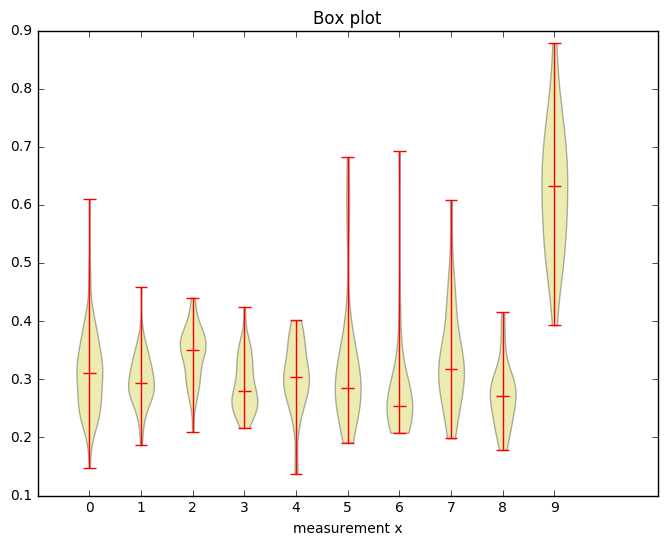

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties

#all_data = [np.random.normal(0, std, 100) for std in range(1, 4)]
all_data = [np.array(author_richness[i]) for i in author_richness]

fig = plt.figure(figsize=(8,6))
 
'''plt.boxplot(all_data,
            notch=False, # box instead of notch shape
            sym='rs',    # red squares for outliers
            vert=True)   # vertical box aligmnent'''

plt.violinplot(all_data,
               showmeans=False,
               showmedians=True
               )
 
#plt.xticks([y+1 for y in range(len(all_data))], ['x1', 'x2', 'x3'])
plt.xticks([y+1 for y in range(len(all_data))], [i for i,e in enumerate(author_richness)])
print ([(e,i) for i,e in enumerate(author_richness)])

plt.xlabel('measurement x')
t = plt.title('Box plot')
plt.show()

In [34]:
import codecs
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import OrderedDict,defaultdict,Counter

condicate_author_path = "D:\\課業相關\\論文資料\\SVM\\condicate_author\\"
condicate_author = ['雷震','殷海光','夏道平','傅正','龍平甫','蔣勻田','朱伴耘','胡適','羅鴻詔']

#建立作者索引，提取各作者文章內容及索引
author_index = defaultdict(int)
for index,name in enumerate(condicate_author): #建立作者索引
    author_index[name] = index

author_index = OrderedDict(sorted(author_index.items(), key=lambda t: t[1])) #作者索引排序(依文本數量高到低)

for name,index in author_index.items():
    print (name+':'+str(index),end=' ')
print ()
    
content_list = [] #所有作者文本內容(未處理)
article_label = [] #各文本label，也就是作者索引

a_c = defaultdict(int)

for file in os.listdir(condicate_author_path):
    with codecs.open(condicate_author_path+file,'rb','utf8') as f:
        
        title = f.readline()
        content = f.readline().strip()

        content_list.append(content)
        
        article_label.append(author_index[file.split('_')[0]])
        
        
print ('共有'+str(len(content_list))+'篇文章')

雷震:0 殷海光:1 夏道平:2 傅正:3 龍平甫:4 蔣勻田:5 朱伴耘:6 胡適:7 羅鴻詔:8 
共有433篇文章


In [35]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(content_list)
print (tfidf.shape)

words = vectorizer.get_feature_names()
for i in range(len(content_list)):
    print ('----Document %d----' % (i))
    for j in range(len(words)):
        if tfidf[i,j] > 0.1:
            print (words[j], tfidf[i,j])

(433, 52814)
----Document 0----
cbb 0.158053482973
commacategory 0.325101879611
de 0.317391953612
na 0.69774830288
periodcategory 0.101514025649
shi 0.114627717661
vc 0.111793926981
vh 0.273702372953
個人 0.176694144468
國家 0.157916215545
自由 0.19415164653
----Document 1----
cbb 0.186141241332
commacategory 0.359591034392
de 0.27639154016
na 0.671236597531
parenthesiscategory 0.186570633083
vc 0.174859953979
ve 0.124094160888
vh 0.246778160857
民盟 0.168403889873
----Document 2----
cbb 0.120288411509
commacategory 0.358099983689
de 0.251637826376
na 0.705138964021
nc 0.164532424938
vc 0.219837441724
vh 0.232281070501
出版法 0.118385307081
----Document 3----
cbb 0.15370668721
commacategory 0.398173513533
de 0.240075206689
na 0.692412029049
nc 0.133212462248
vc 0.223972601363
vh 0.237147460266
出版法 0.113404695671
----Document 4----
cbb 0.142101754951
commacategory 0.389633844222
de 0.203526384511
na 0.57849166048
nc 0.196192100385
neu 0.199859242448
nf 0.16868853491
va 0.122849259119
vc 0.17968996

KeyboardInterrupt: 

In [8]:
import codecs
import os
from collections import defaultdict

author = defaultdict(list)
error = defaultdict(list)

with codecs.open('C:\\Users\\user\\Desktop\\first.csv','rb','utf8') as f:
    content = f.readlines()
    
    for i in content:
        if i.strip() == '':
            continue
        v = i.strip().split(',')
        temp = []
        for j in range(1,len(v)):
            if float(v[j]) != 0.0:
                temp.append(j)
        if temp not in author[v[0]]:
            author[v[0]].append(temp)
            
with codecs.open('C:\\Users\\user\\Desktop\\second.csv','rb','utf8') as f:
    content = f.readlines()
    
    for i in content:
        if i.strip() == '':
            continue
        v = i.strip().split(',')
        temp = []
        for j in range(1,len(v)):
            if float(v[j]) != 0.0:
                temp.append(j)
        if temp not in author[v[0]]:
            error[v[0]].append(temp)
            
for k,v in error.items():
    print (k,v)
    print ()

8 [[3, 4, 10, 11, 16, 24, 37, 60, 68, 79, 85], [2, 6, 10, 18, 21, 24, 45, 48, 54, 61], [2, 3, 4, 10, 19, 23, 28, 40, 49, 60, 67, 71, 75, 84], [2, 3, 5, 15, 17, 18, 35, 40, 50, 56, 61, 63, 85], [3, 24, 49, 54, 61, 71], [1, 2, 15, 18, 40, 43, 50, 75], [2, 3, 5, 15, 35, 49, 63, 71, 85], [2, 3, 5, 15, 35, 49, 63, 71, 85], [2, 4, 5, 8, 11, 15, 16, 27, 35, 63, 76, 79, 85], [3, 24, 49, 54, 61, 71], [2, 3, 5, 15, 35, 49, 63, 71, 85], [1, 2, 3, 17, 23, 24, 32, 39, 51, 52, 69, 78, 98, 99], [1, 4, 9, 11, 15, 22, 24, 25, 27, 32, 33, 39, 54, 57, 66, 69], [2, 3, 5, 15, 17, 18, 35, 40, 50, 56, 61, 63, 85], [1, 4, 9, 15, 22, 24, 25, 27, 32, 39, 54, 57, 61, 66, 69], [1, 2, 3, 23, 24, 32, 39, 52, 54, 61, 78, 99], [2, 5, 15, 24, 35, 54, 61, 63, 85], [3, 4, 10, 11, 16, 22, 27, 37, 39, 69, 79, 85, 88], [2, 3, 5, 15, 17, 18, 35, 40, 50, 56, 61, 63, 85], [3, 4, 10, 11, 16, 22, 27, 37, 39, 69, 79, 85, 88], [3, 4, 8, 10, 11, 15, 16, 22, 27, 39, 69, 76, 79, 88], [3, 24, 49, 54, 61, 71], [2, 3, 4, 6, 10, 11, 15,

In [6]:
import codecs
import os 

#input_path = 'D:\\課業相關\\論文資料\\雷震處理資料\\source\\日記\\all\\'
input_path = 'D:\\課業相關\\論文資料\\論文程式\\condicate\\author\\'
out_path = 'D:\\課業相關\\論文資料\\論文程式\\condicate\\topic\\'

'''index = 1
for file in os.listdir(input_path):
    with codecs.open(input_path+file,'rb','utf8') as f:
        content = f.readline().strip()
        if content == '':
            print (file,'ERROR')
        else:
            with codecs.open(out_path+'私領域_'+str(index)+'.txt','wb','utf8') as g:
                g.write('#'+file.split('.')[0]+'\r\n')
                g.write(content+'\r\n')
            index += 1'''

for file in os.listdir(input_path):
    if '雷震' not in file:
        continue
    with codecs.open(input_path+file,'rb','utf8') as f:
        head = f.readline().strip()
        content = f.readline().strip()
        with codecs.open(out_path+'公領域_'+file.split('_')[1],'wb','utf8') as g:
            g.write(head+'\r\n')
            g.write(content+'\r\n')